In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf

In [ ]:
tf.enable_eager_execution()

In [ ]:
tf.__version__

'1.15.2'

In [ ]:
import numpy as np

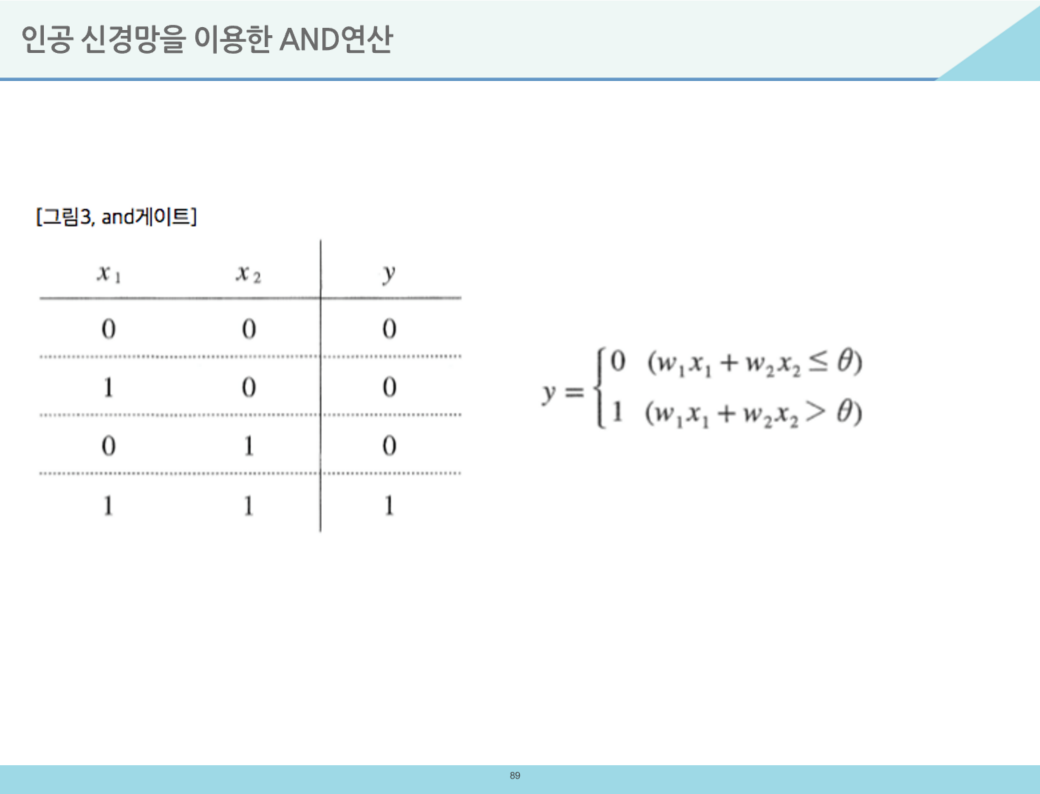

In [ ]:
X = np.array(
                [
                  [0 , 0],
                  [0 , 1],
                  [1 , 0],
                  [1 , 1]
                ], dtype="float32"
)

In [ ]:
X

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32)

In [ ]:
y = np.array([
               [0],
               [0],
               [0],
               [1]
            ], dtype="float32")

In [ ]:
y

array([[0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

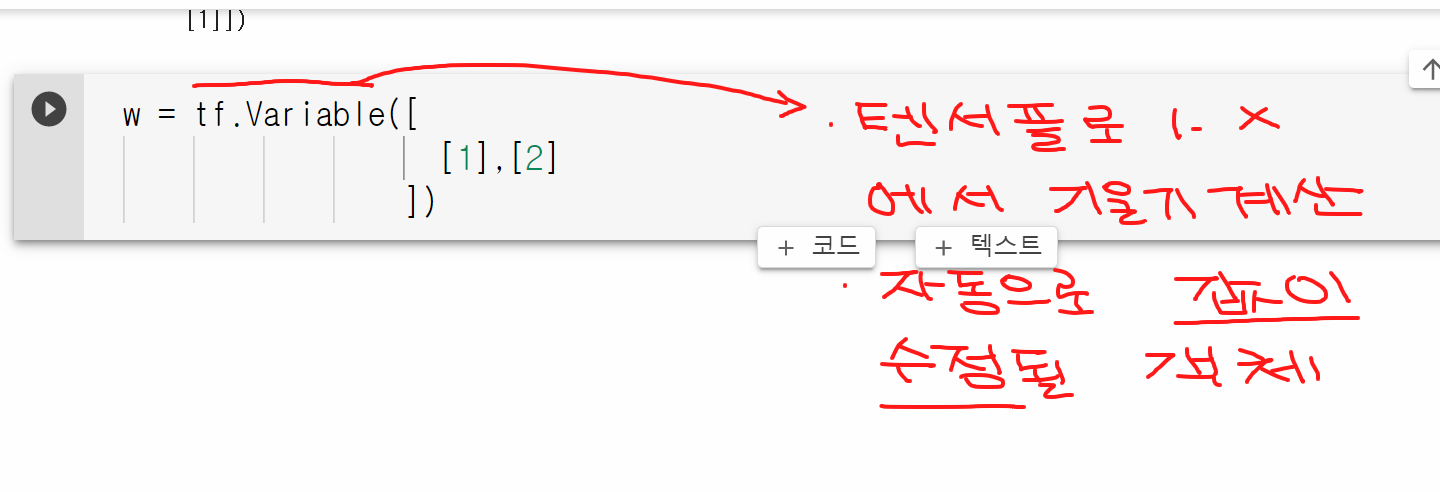

In [ ]:
w = tf.Variable([
                  [1],[2]
                ], dtype="float32")

In [ ]:
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.],
       [2.]], dtype=float32)>

In [ ]:
b = tf.Variable([3], dtype="float32")

In [ ]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([3.], dtype=float32)>

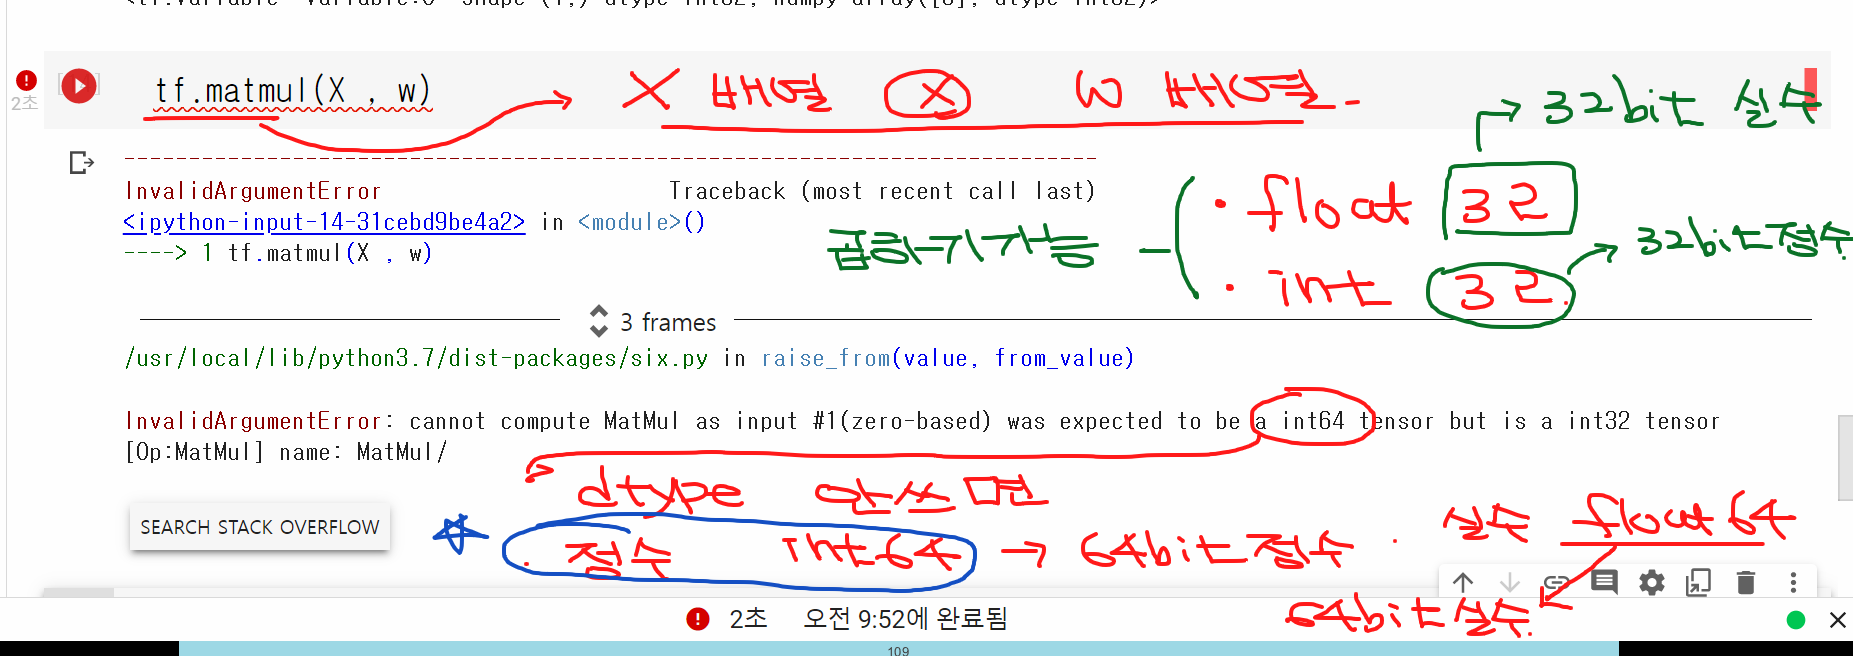

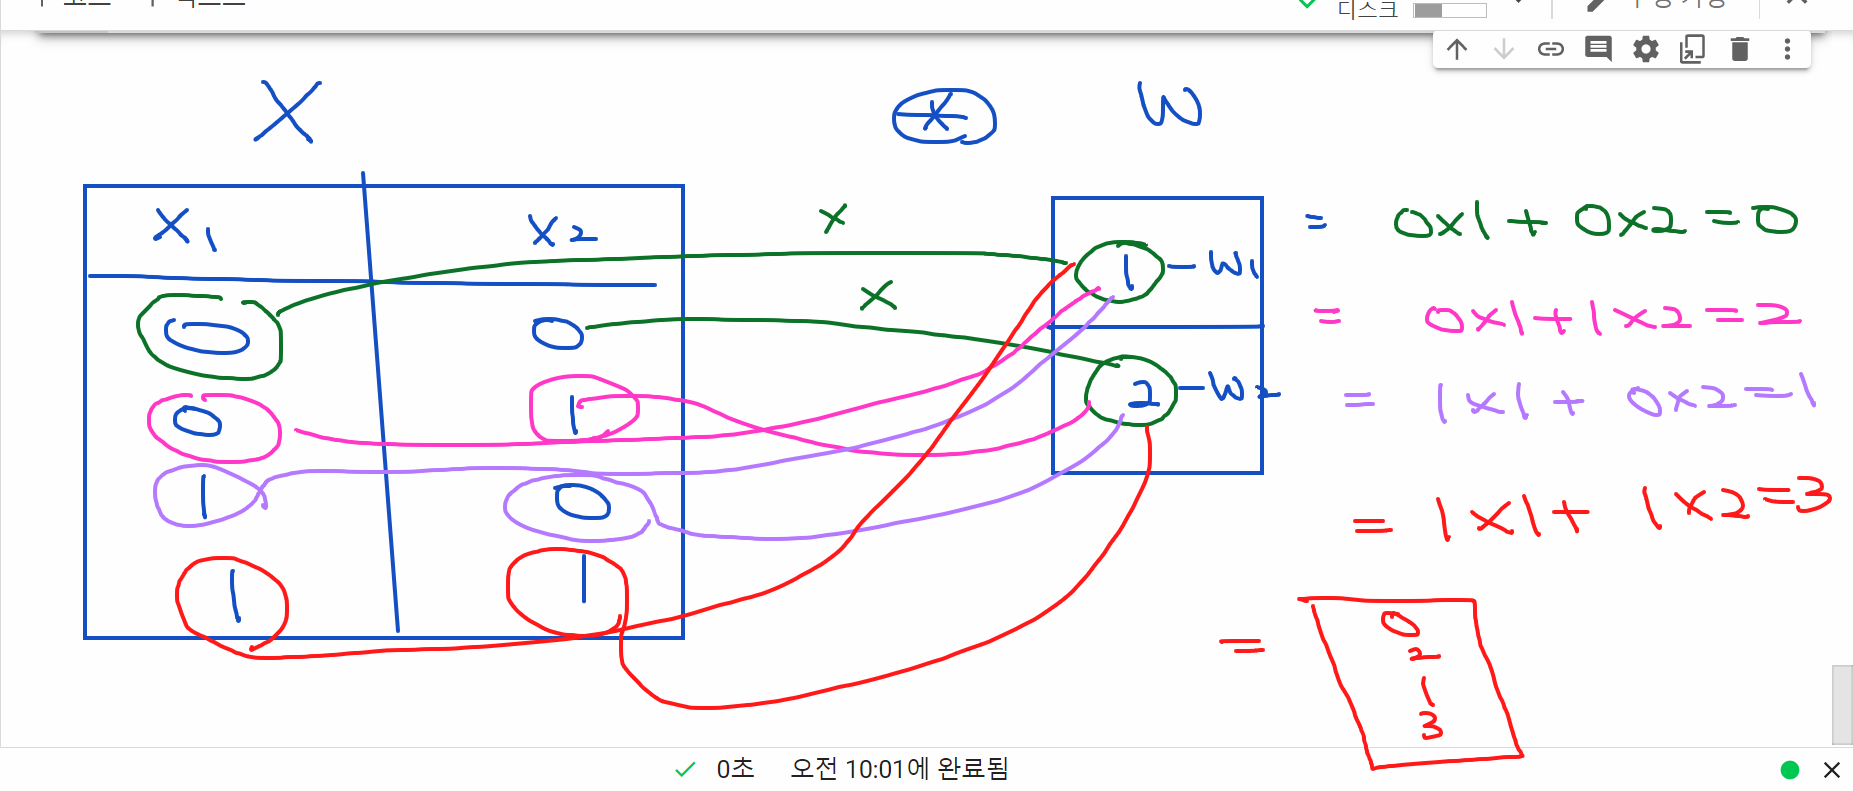

In [ ]:
tf.matmul(X , w)

<tf.Tensor: id=61, shape=(4, 1), dtype=float32, numpy=
array([[0.],
       [2.],
       [1.],
       [3.]], dtype=float32)>

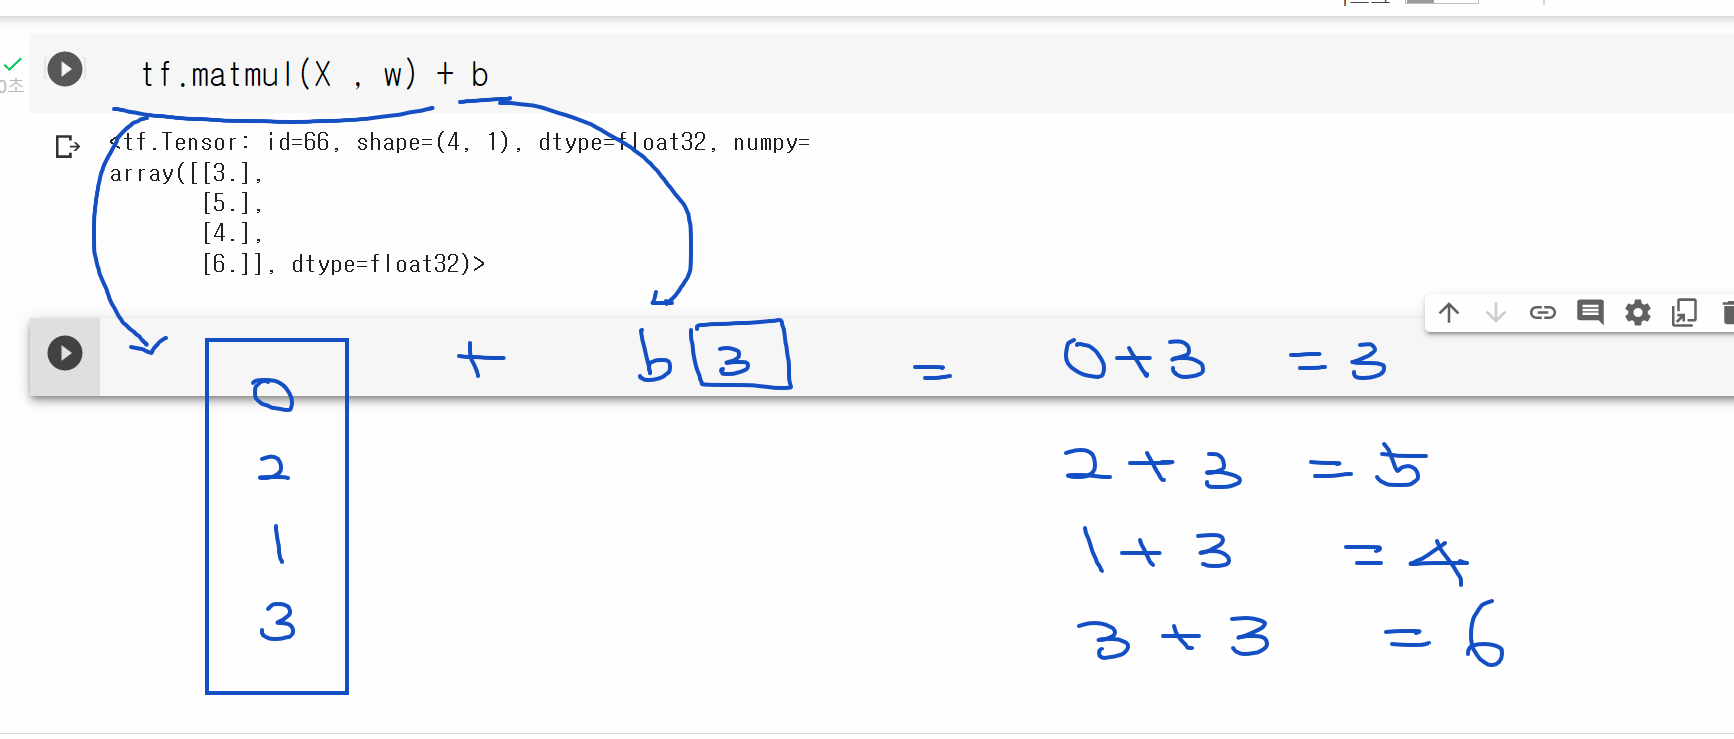

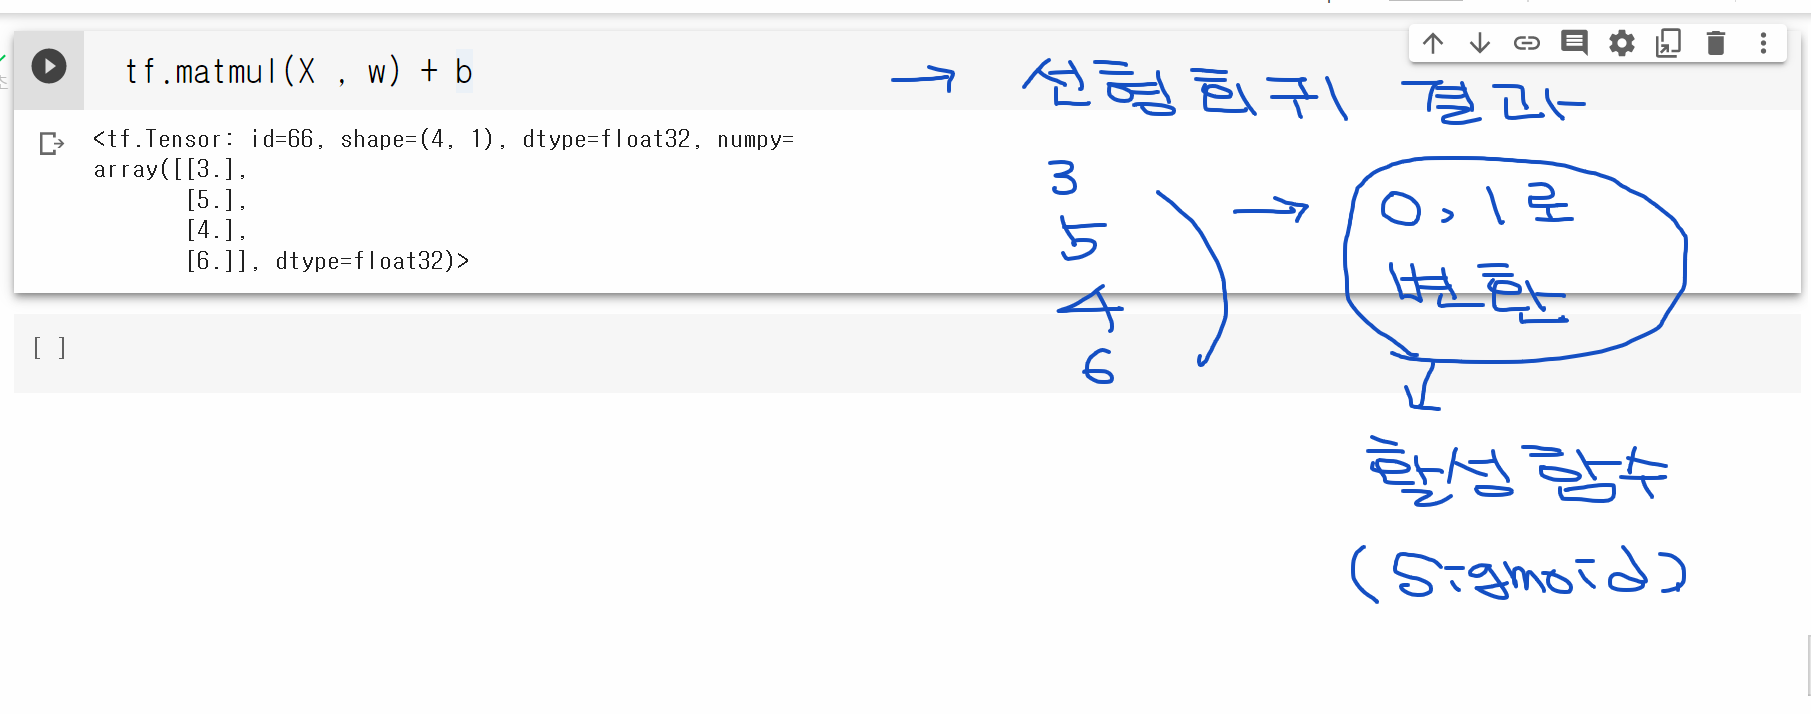

In [ ]:
tf.matmul(X , w) + b

<tf.Tensor: id=66, shape=(4, 1), dtype=float32, numpy=
array([[3.],
       [5.],
       [4.],
       [6.]], dtype=float32)>

In [ ]:
tf.sigmoid( tf.matmul(X , w) + b  )

<tf.Tensor: id=72, shape=(4, 1), dtype=float32, numpy=
array([[0.95257413],
       [0.9933072 ],
       [0.98201376],
       [0.9975274 ]], dtype=float32)>

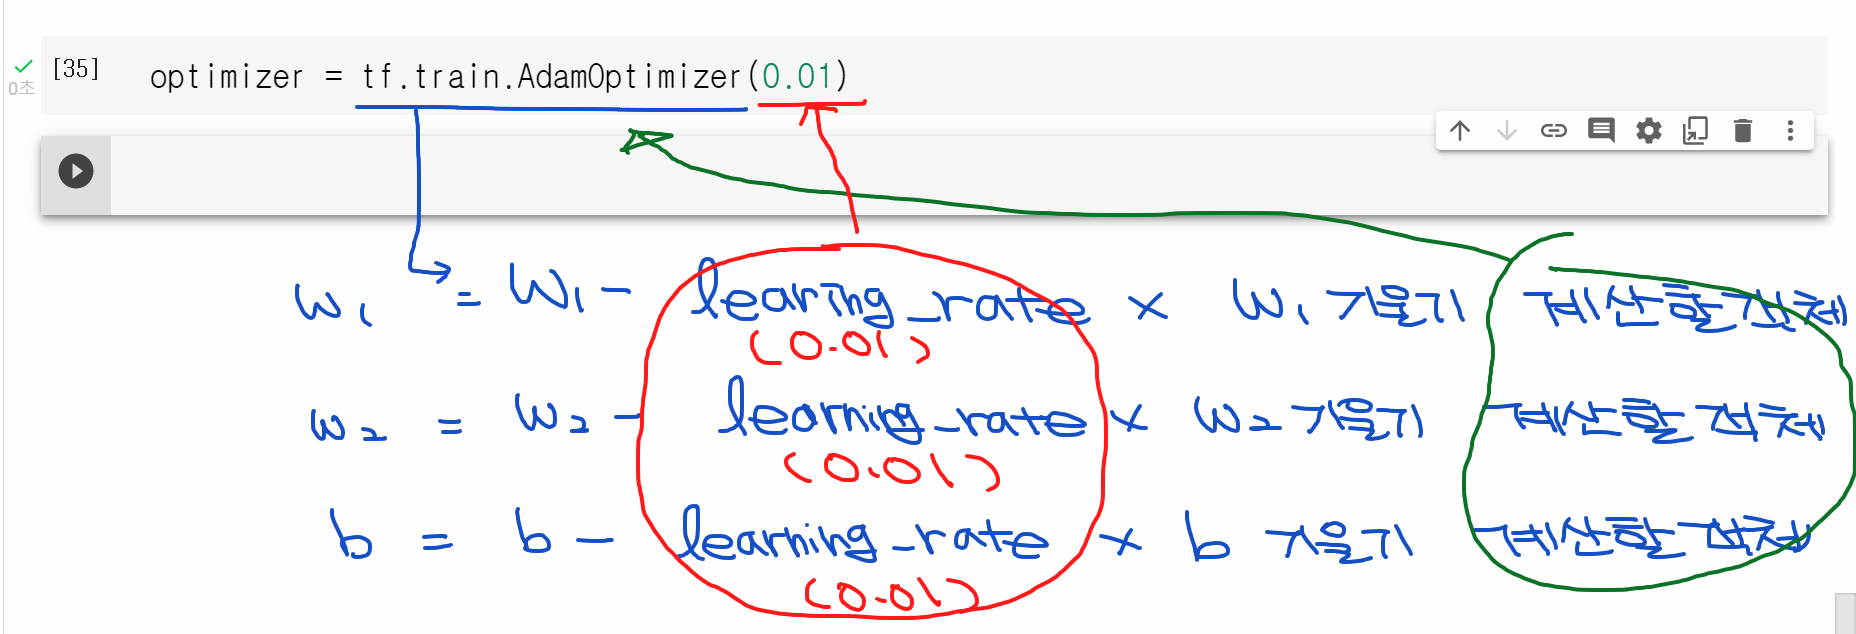

In [ ]:
optimizer = tf.train.AdamOptimizer(0.01)

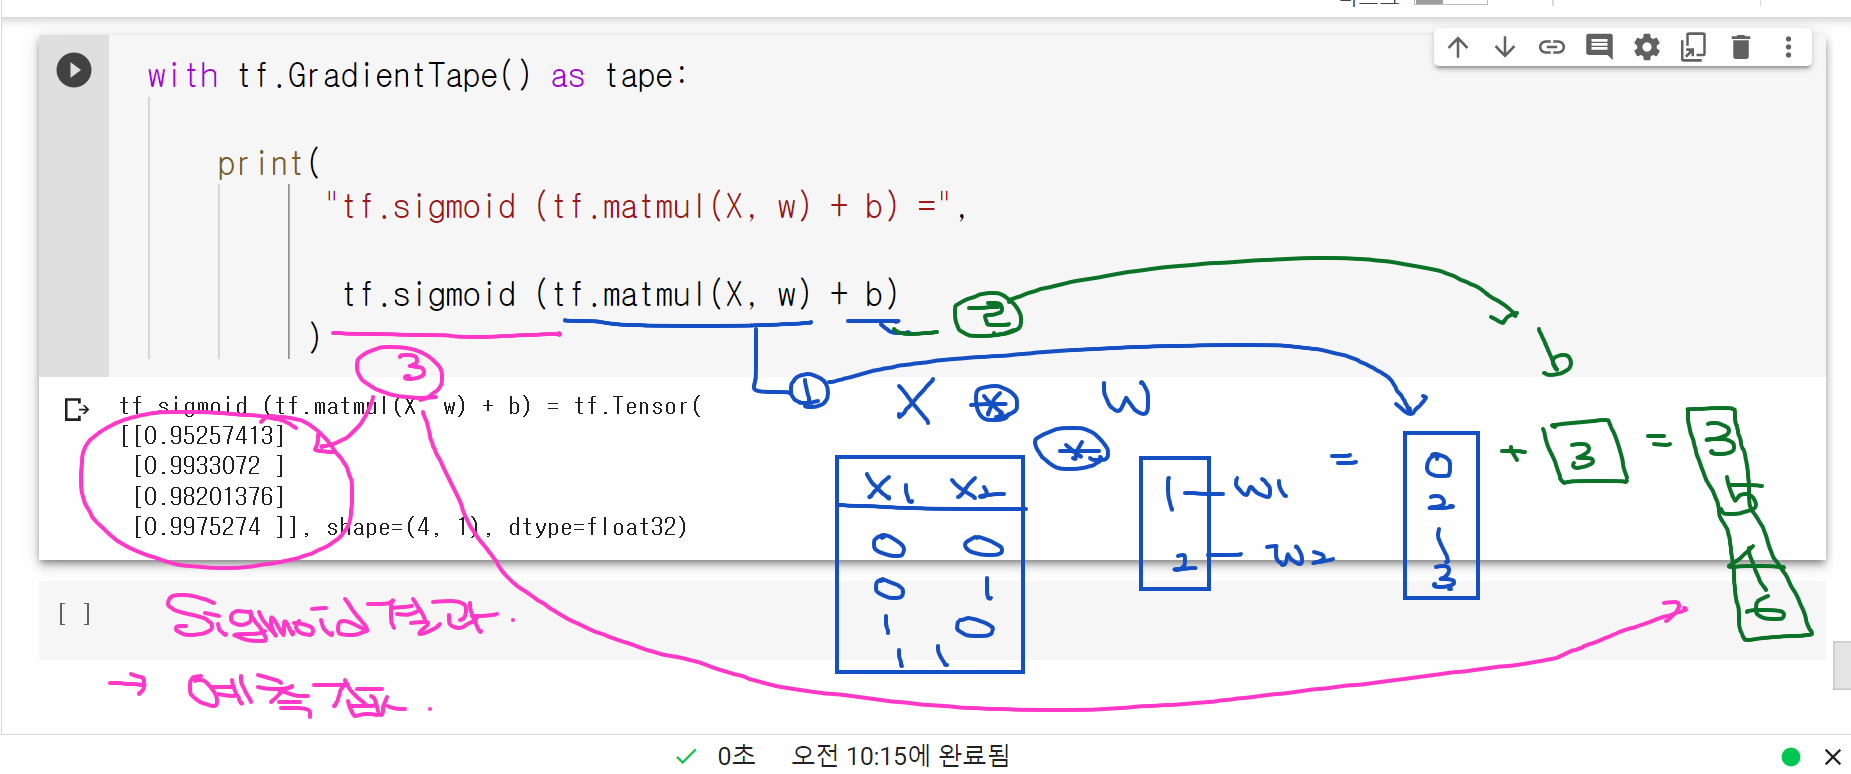

In [ ]:
with tf.GradientTape() as tape:

    print( 
          "tf.sigmoid (tf.matmul(X, w) + b) =",  
          
           tf.sigmoid (tf.matmul(X, w) + b) 
         )

tf.sigmoid (tf.matmul(X, w) + b) = tf.Tensor(
[[0.95257413]
 [0.9933072 ]
 [0.98201376]
 [0.9975274 ]], shape=(4, 1), dtype=float32)


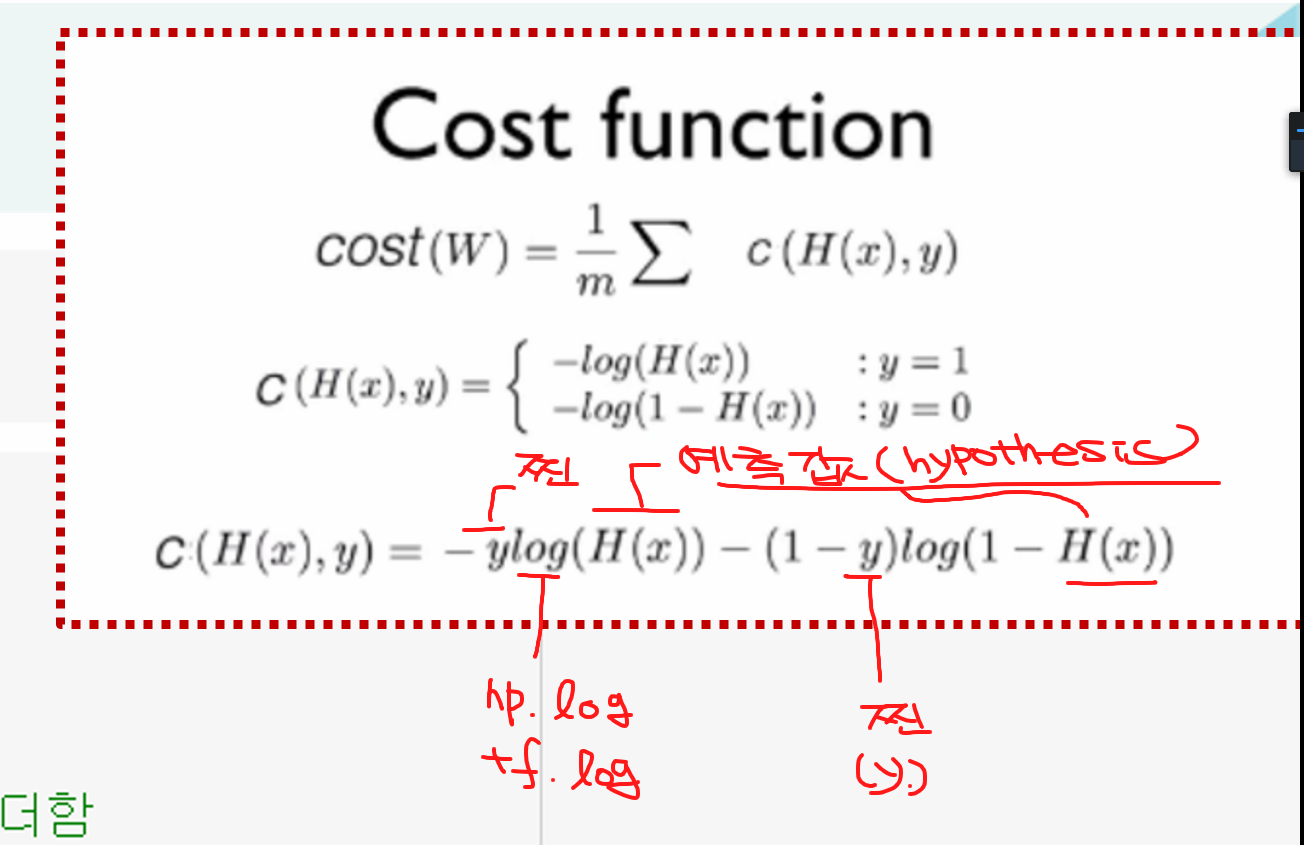

In [ ]:
with tf.GradientTape() as tape:

    hypothesis = tf.sigmoid (tf.matmul(X, w) + b)
    print("hypothesis = ", hypothesis)

    print ( 
        "np.sum( -y * tf.log(hypothesis) - (1-y)* tf.log(1-hypothesis) ) /4 =" ,

        np.sum( -y * tf.log(hypothesis) - (1-y)* tf.log(1-hypothesis) ) /4 
        
    )

hypothesis =  tf.Tensor(
[[0.95257413]
 [0.9933072 ]
 [0.98201376]
 [0.9975274 ]], shape=(4, 1), dtype=float32)
np.sum( -y * tf.log(hypothesis) - (1-y)* tf.log(1-hypothesis) ) /4 = 3.0189826488494873


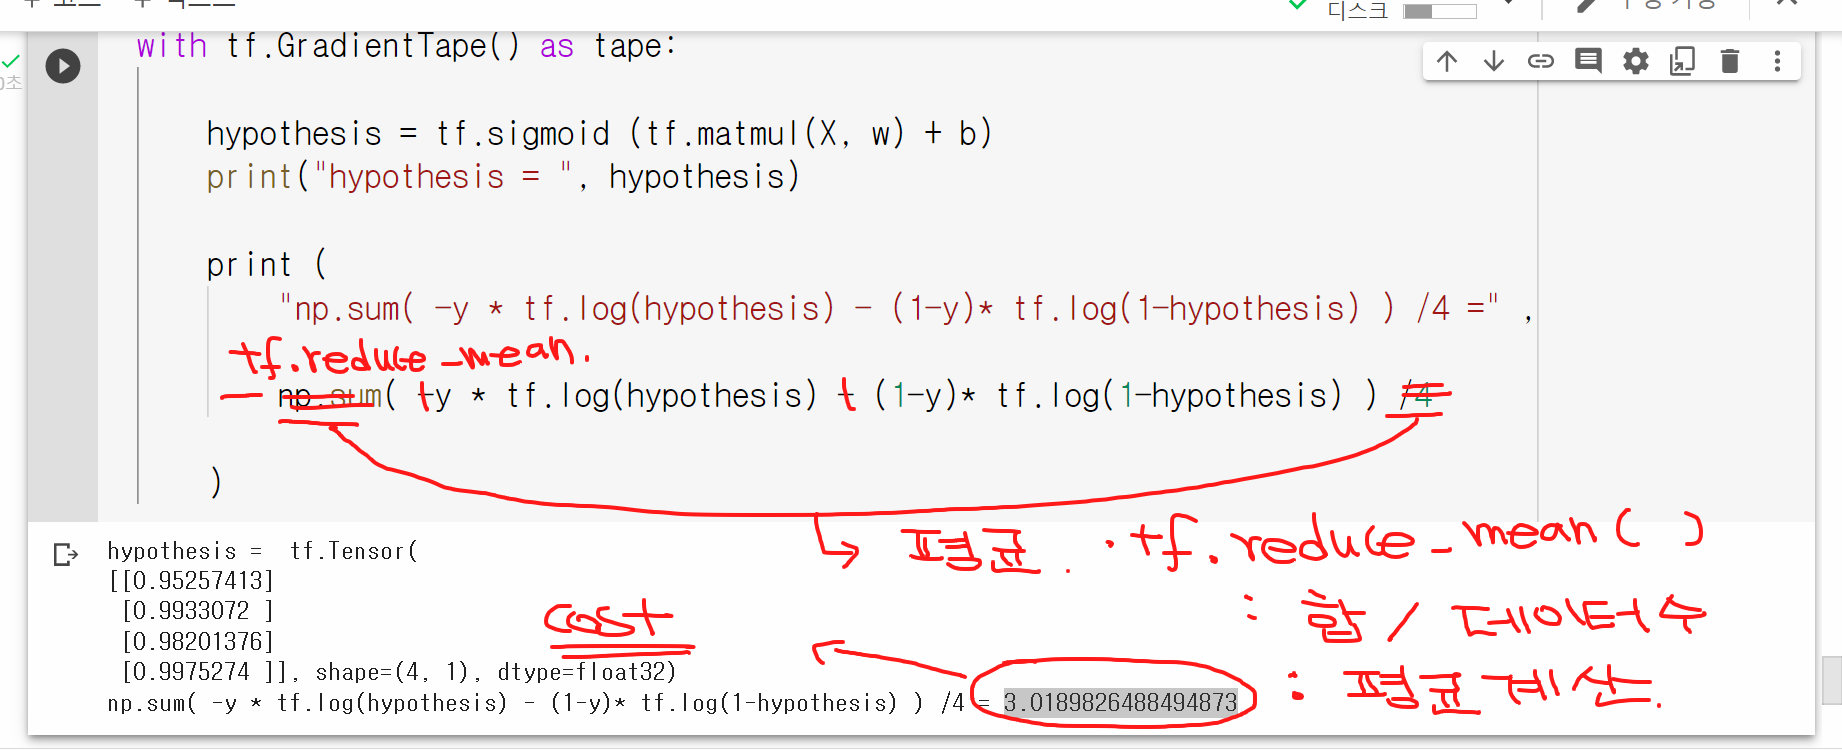

In [ ]:
with tf.GradientTape() as tape:

    hypothesis = tf.sigmoid (tf.matmul(X, w) + b)
    print("hypothesis = ", hypothesis)

    cost = -tf.reduce_mean( y * tf.log(hypothesis) +  (1-y)* tf.log(1-hypothesis) )

    print("cost = ", cost)     

hypothesis =  tf.Tensor(
[[0.95257413]
 [0.9933072 ]
 [0.98201376]
 [0.9975274 ]], shape=(4, 1), dtype=float32)
cost =  tf.Tensor(3.0189826, shape=(), dtype=float32)


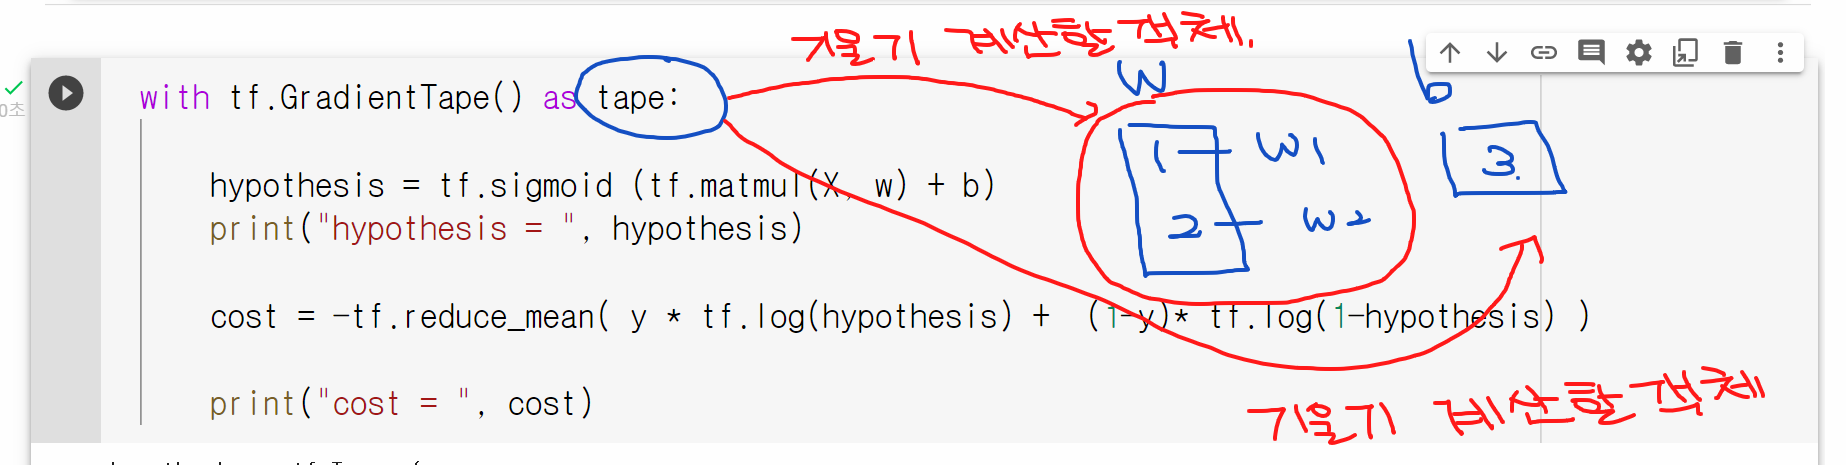

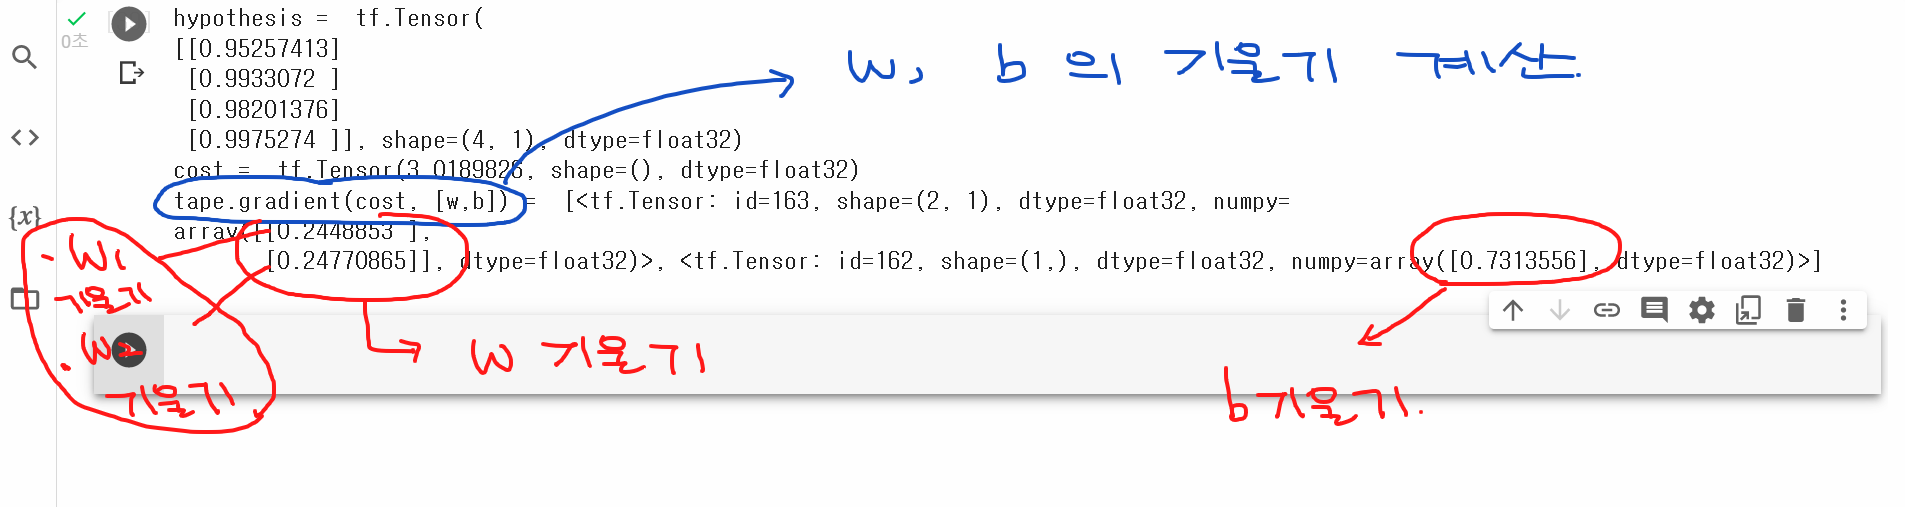

In [ ]:
with tf.GradientTape() as tape:

    hypothesis = tf.sigmoid (tf.matmul(X, w) + b)
    print("hypothesis = ", hypothesis)

    cost = -tf.reduce_mean( y * tf.log(hypothesis) +  (1-y)* tf.log(1-hypothesis) )
    print("cost = ", cost)    

    print(
         "tape.gradient(cost, [w,b]) = ", 
          
          tape.gradient(cost, [w,b])
          )

hypothesis =  tf.Tensor(
[[0.95257413]
 [0.9933072 ]
 [0.98201376]
 [0.9975274 ]], shape=(4, 1), dtype=float32)
cost =  tf.Tensor(3.0189826, shape=(), dtype=float32)
tape.gradient(cost, [w,b]) =  [<tf.Tensor: id=163, shape=(2, 1), dtype=float32, numpy=
array([[0.2448853 ],
       [0.24770865]], dtype=float32)>, <tf.Tensor: id=162, shape=(1,), dtype=float32, numpy=array([0.7313556], dtype=float32)>]


In [ ]:
with tf.GradientTape() as tape:

    hypothesis = tf.sigmoid (tf.matmul(X, w) + b)
    print("hypothesis = ", hypothesis)

    cost = -tf.reduce_mean( y * tf.log(hypothesis) +  (1-y)* tf.log(1-hypothesis) )
    print("cost = ", cost)    

    grads = tape.gradient(cost, [w,b])
    print("grads =", grads)

    

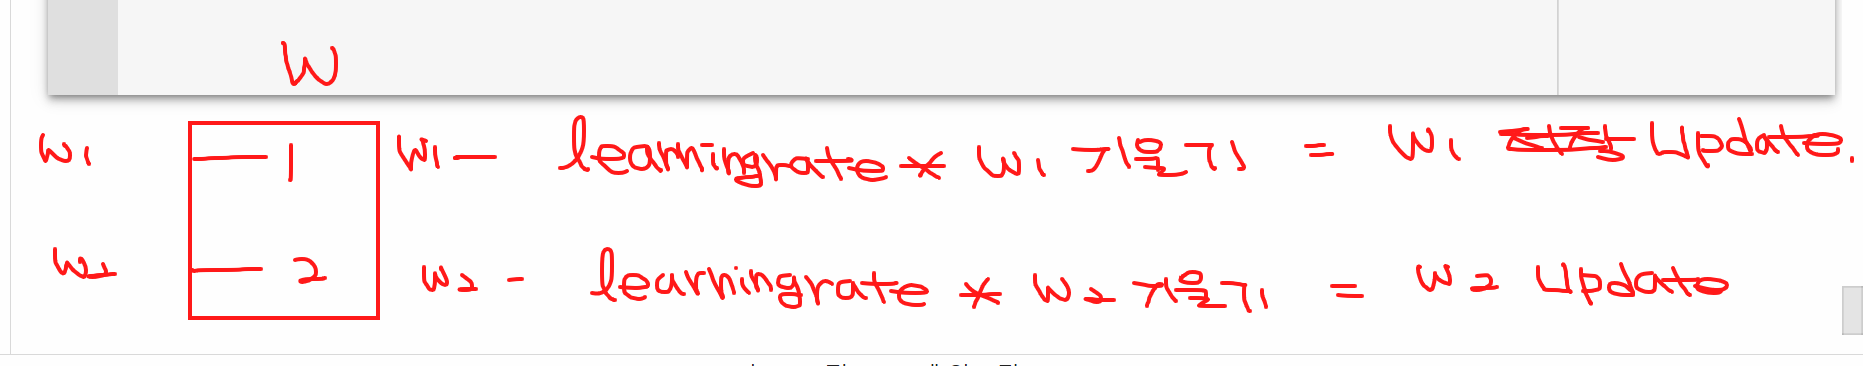

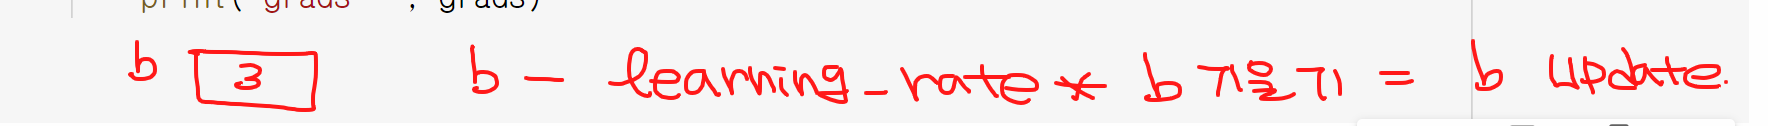

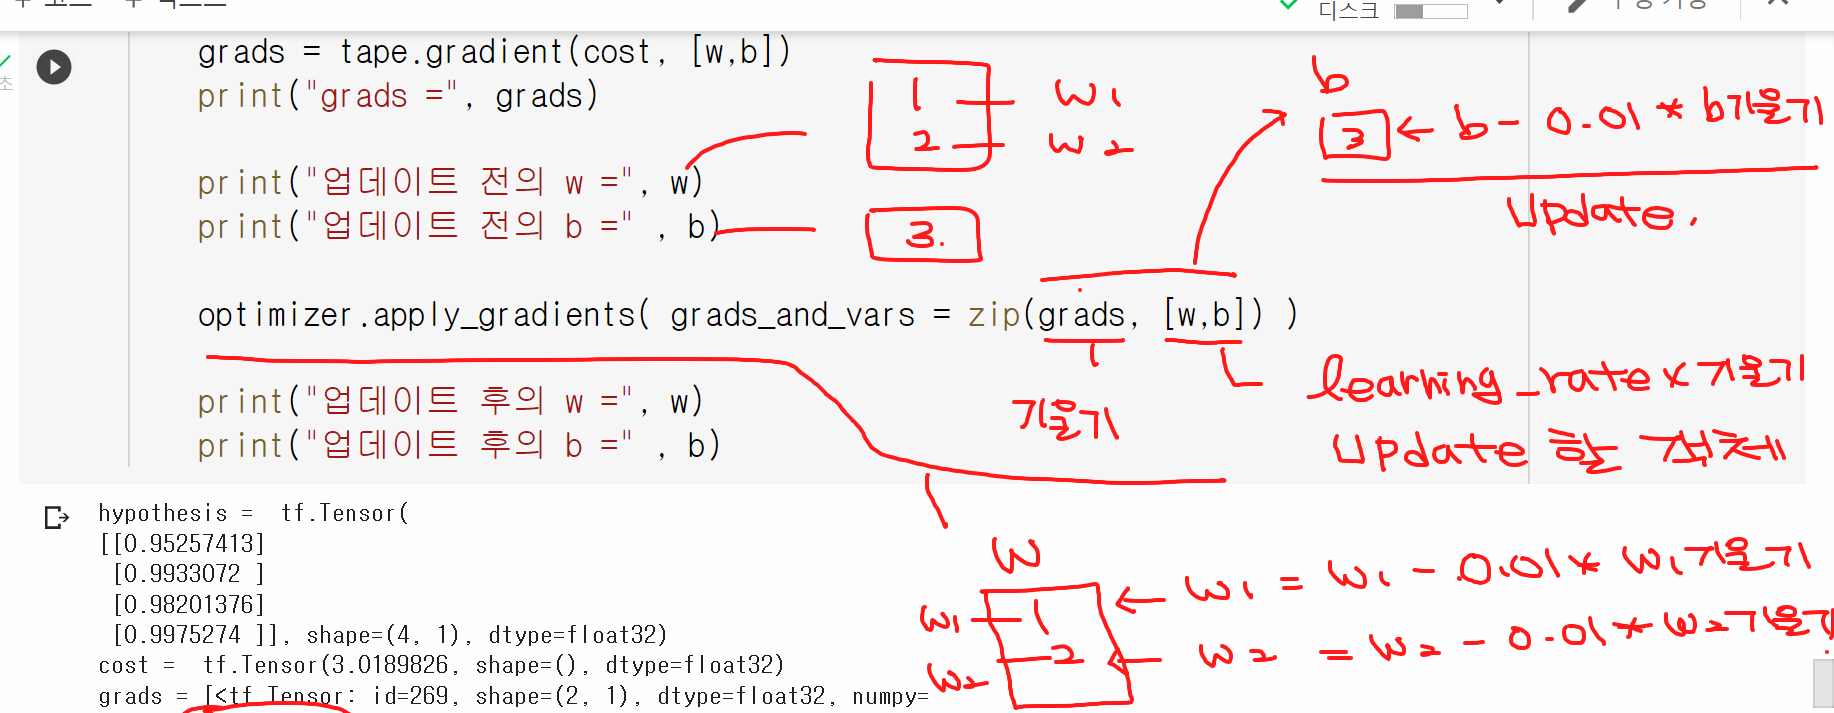

In [ ]:
with tf.GradientTape() as tape:

    hypothesis = tf.sigmoid (tf.matmul(X, w) + b)
    print("hypothesis = ", hypothesis)

    cost = -tf.reduce_mean( y * tf.log(hypothesis) +  (1-y)* tf.log(1-hypothesis) )
    print("cost = ", cost)    

    grads = tape.gradient(cost, [w,b])
    print("grads =", grads)

    print("업데이트 전의 w =", w)
    print("업데이트 전의 b =" , b)
    
    optimizer.apply_gradients( grads_and_vars = zip(grads, [w,b]) ) 

    print("업데이트 후의 w =", w)
    print("업데이트 후의 b =" , b)

hypothesis =  tf.Tensor(
[[0.95257413]
 [0.9933072 ]
 [0.98201376]
 [0.9975274 ]], shape=(4, 1), dtype=float32)
cost =  tf.Tensor(3.0189826, shape=(), dtype=float32)
grads = [<tf.Tensor: id=269, shape=(2, 1), dtype=float32, numpy=
array([[0.2448853 ],
       [0.24770865]], dtype=float32)>, <tf.Tensor: id=268, shape=(1,), dtype=float32, numpy=array([0.7313556], dtype=float32)>]
업데이트 전의 w = <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.],
       [2.]], dtype=float32)>
업데이트 전의 b = <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([3.], dtype=float32)>
업데이트 후의 w = <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.99],
       [1.99]], dtype=float32)>
업데이트 후의 b = <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.99], dtype=float32)>


In [ ]:
for step in range(1000):
    with tf.GradientTape() as tape:

        hypothesis = tf.sigmoid (tf.matmul(X, w) + b)
        print("hypothesis = ", hypothesis)

        cost = -tf.reduce_mean( y * tf.log(hypothesis) +  (1-y)* tf.log(1-hypothesis) )
        print("cost = ", cost)    

        grads = tape.gradient(cost, [w,b])
        print("grads =", grads)

        print("업데이트 전의 w =", w)
        print("업데이트 전의 b =" , b)
        
        optimizer.apply_gradients( grads_and_vars = zip(grads, [w,b]) ) 

        print("업데이트 후의 w =", w)
        print("업데이트 후의 b =" , b)
        print("=" * 100)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [0.5693451 ]], shape=(4, 1), dtype=float32)
cost =  tf.Tensor(0.39994133, shape=(), dtype=float32)
grads = [<tf.Tensor: id=58773, shape=(2, 1), dtype=float32, numpy=
array([[-0.02174202],
       [-0.02111177]], dtype=float32)>, <tf.Tensor: id=58772, shape=(1,), dtype=float32, numpy=array([0.1081557], dtype=float32)>]
업데이트 전의 w = <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.91493016],
       [0.9260872 ]], dtype=float32)>
업데이트 전의 b = <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-1.5618376], dtype=float32)>
업데이트 후의 w = <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.91746104],
       [0.92839766]], dtype=float32)>
업데이트 후의 b = <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-1.565243], dtype=float32)>
hypothesis =  tf.Tensor(
[[0.1728956 ]
 [0.34596   ]
 [0.34348953]
 [0.56969714]], shape=(4, 1), dtype=float32)
cost =  tf.Tensor(0.39946955, shape=(), dtype=float32)
gr

In [ ]:
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.5453968],
       [1.5316243]], dtype=float32)>

In [ ]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-2.4441311], dtype=float32)>

In [ ]:
tf.matmul(X , w) + b

<tf.Tensor: id=78469, shape=(4, 1), dtype=float32, numpy=
array([[-2.4441311 ],
       [-0.9125068 ],
       [-0.89873433],
       [ 0.63289   ]], dtype=float32)>

In [ ]:
tf.sigmoid(  tf.matmul(X , w) + b  )

<tf.Tensor: id=78475, shape=(4, 1), dtype=float32, numpy=
array([[0.07986879],
       [0.28648713],
       [0.28931066],
       [0.6531445 ]], dtype=float32)>

In [ ]:
predict = tf.sigmoid(  tf.matmul(X , w) + b  )

In [ ]:
predict

<tf.Tensor: id=78481, shape=(4, 1), dtype=float32, numpy=
array([[0.07986879],
       [0.28648713],
       [0.28931066],
       [0.6531445 ]], dtype=float32)>

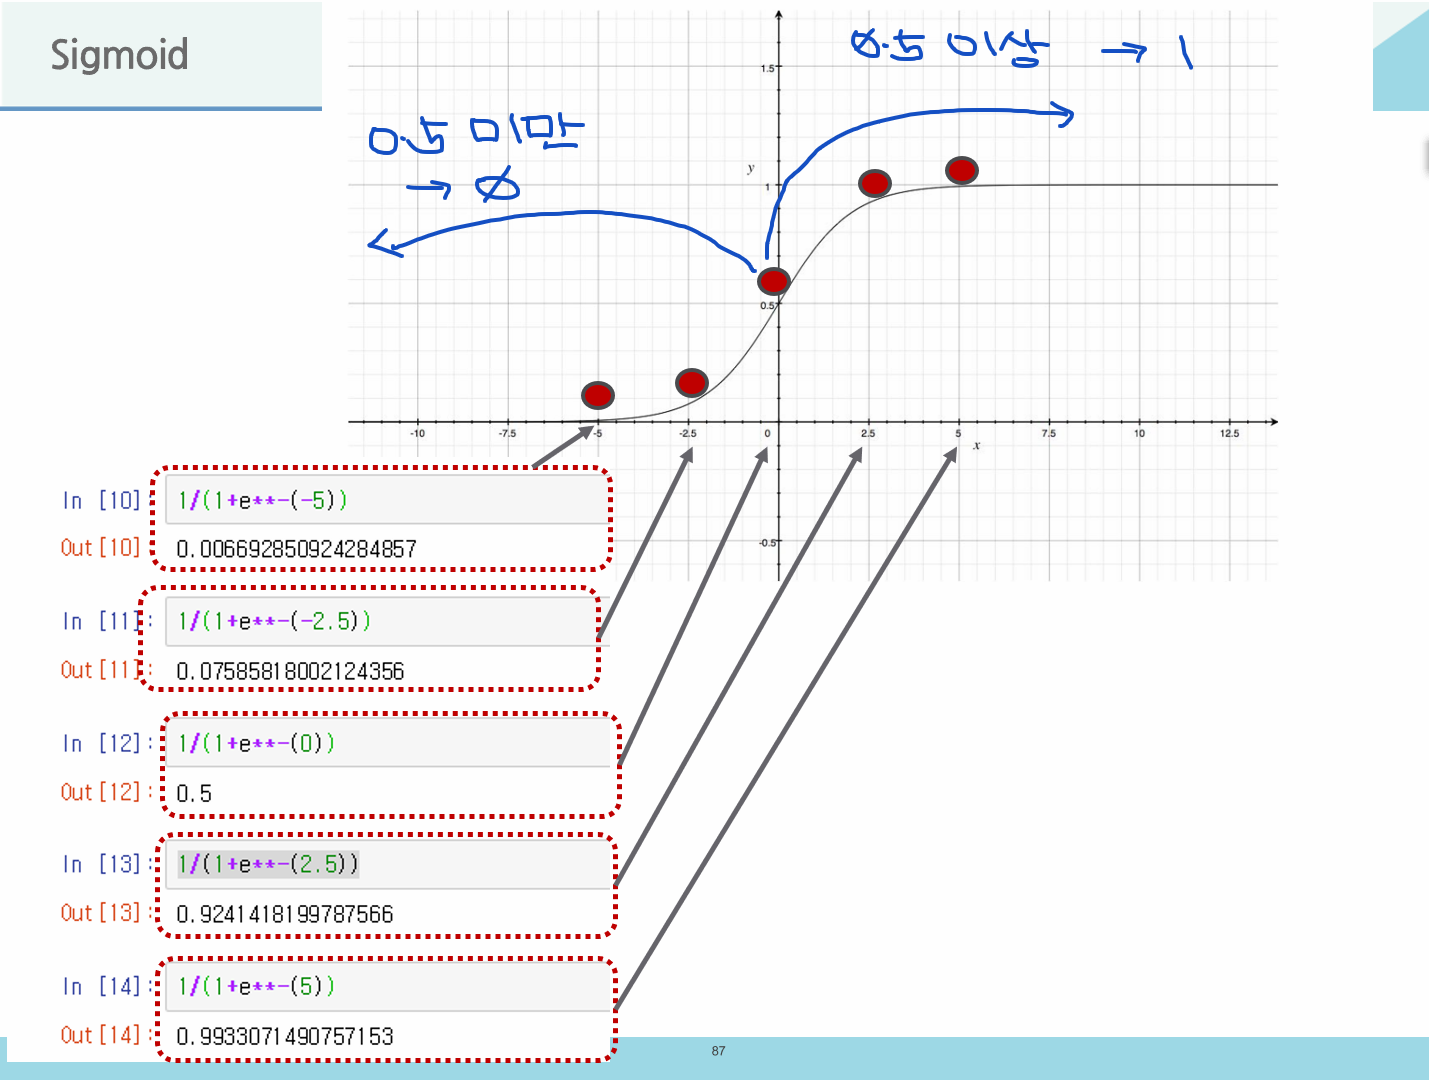

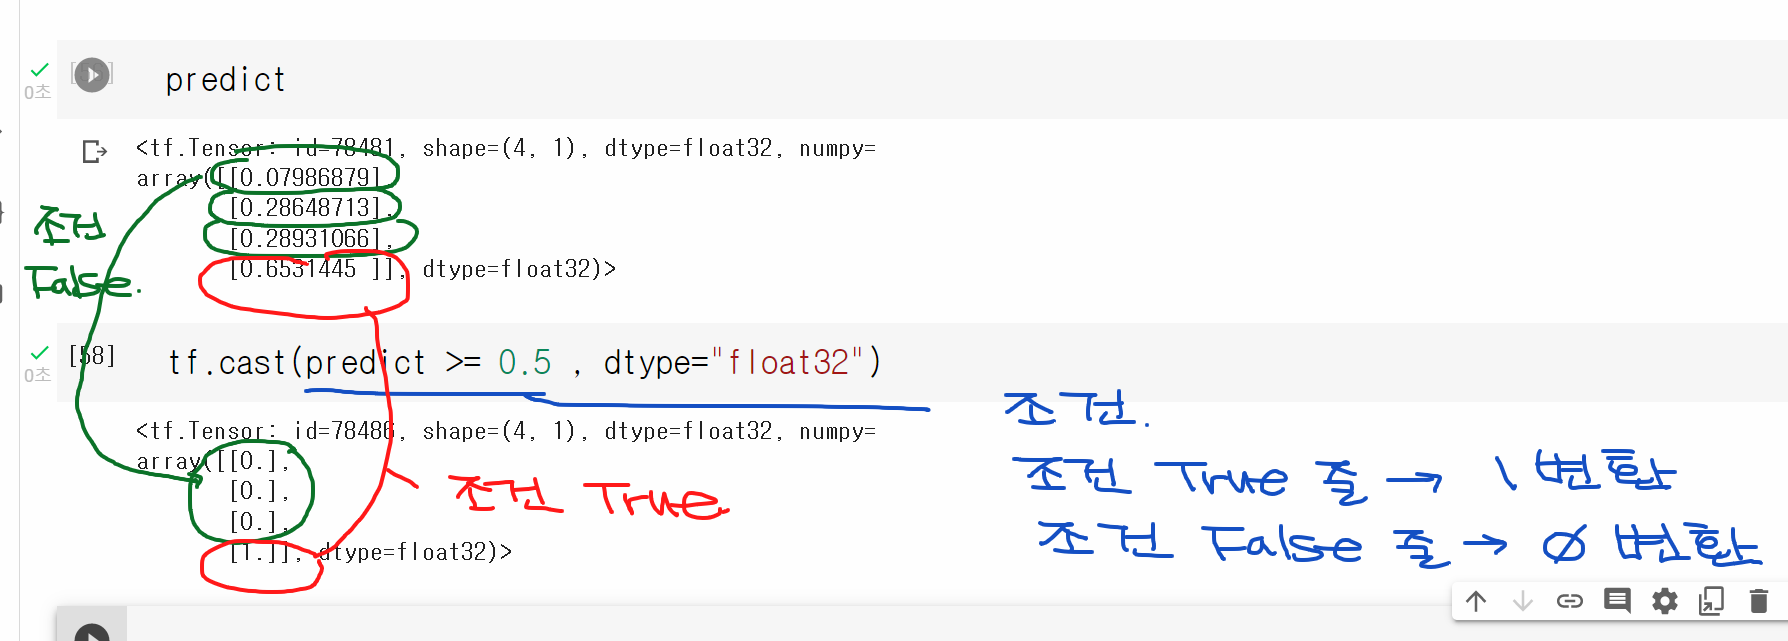

In [ ]:
predict

<tf.Tensor: id=78481, shape=(4, 1), dtype=float32, numpy=
array([[0.07986879],
       [0.28648713],
       [0.28931066],
       [0.6531445 ]], dtype=float32)>

In [ ]:
tf.cast(predict >= 0.5 , dtype="float32")

<tf.Tensor: id=78486, shape=(4, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [1.]], dtype=float32)>

In [ ]:
predict01 = tf.cast(predict >= 0.5 , dtype="float32")

In [ ]:
predict01

<tf.Tensor: id=78489, shape=(4, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [1.]], dtype=float32)>

In [ ]:
y

array([[0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

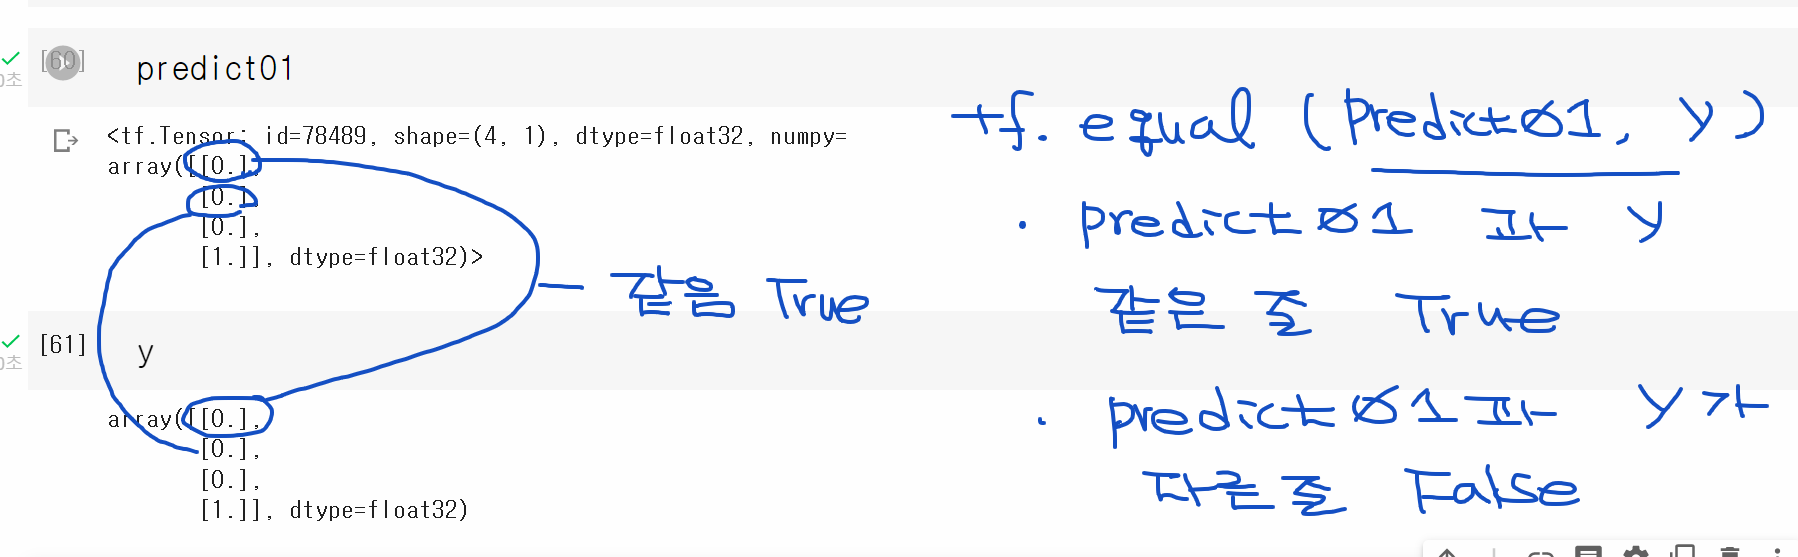

In [ ]:
tf.equal(predict01, y)

<tf.Tensor: id=78491, shape=(4, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True]])>

In [ ]:
ac01 = tf.equal(predict01, y)

In [ ]:
ac01

<tf.Tensor: id=78493, shape=(4, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True]])>

In [ ]:
tf.cast(ac01, dtype="float32")

<tf.Tensor: id=78494, shape=(4, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
ac02 = tf.cast(ac01, dtype="float32")

In [ ]:
ac02

<tf.Tensor: id=78495, shape=(4, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
tf.reduce_mean(ac02)

<tf.Tensor: id=78497, shape=(), dtype=float32, numpy=1.0>

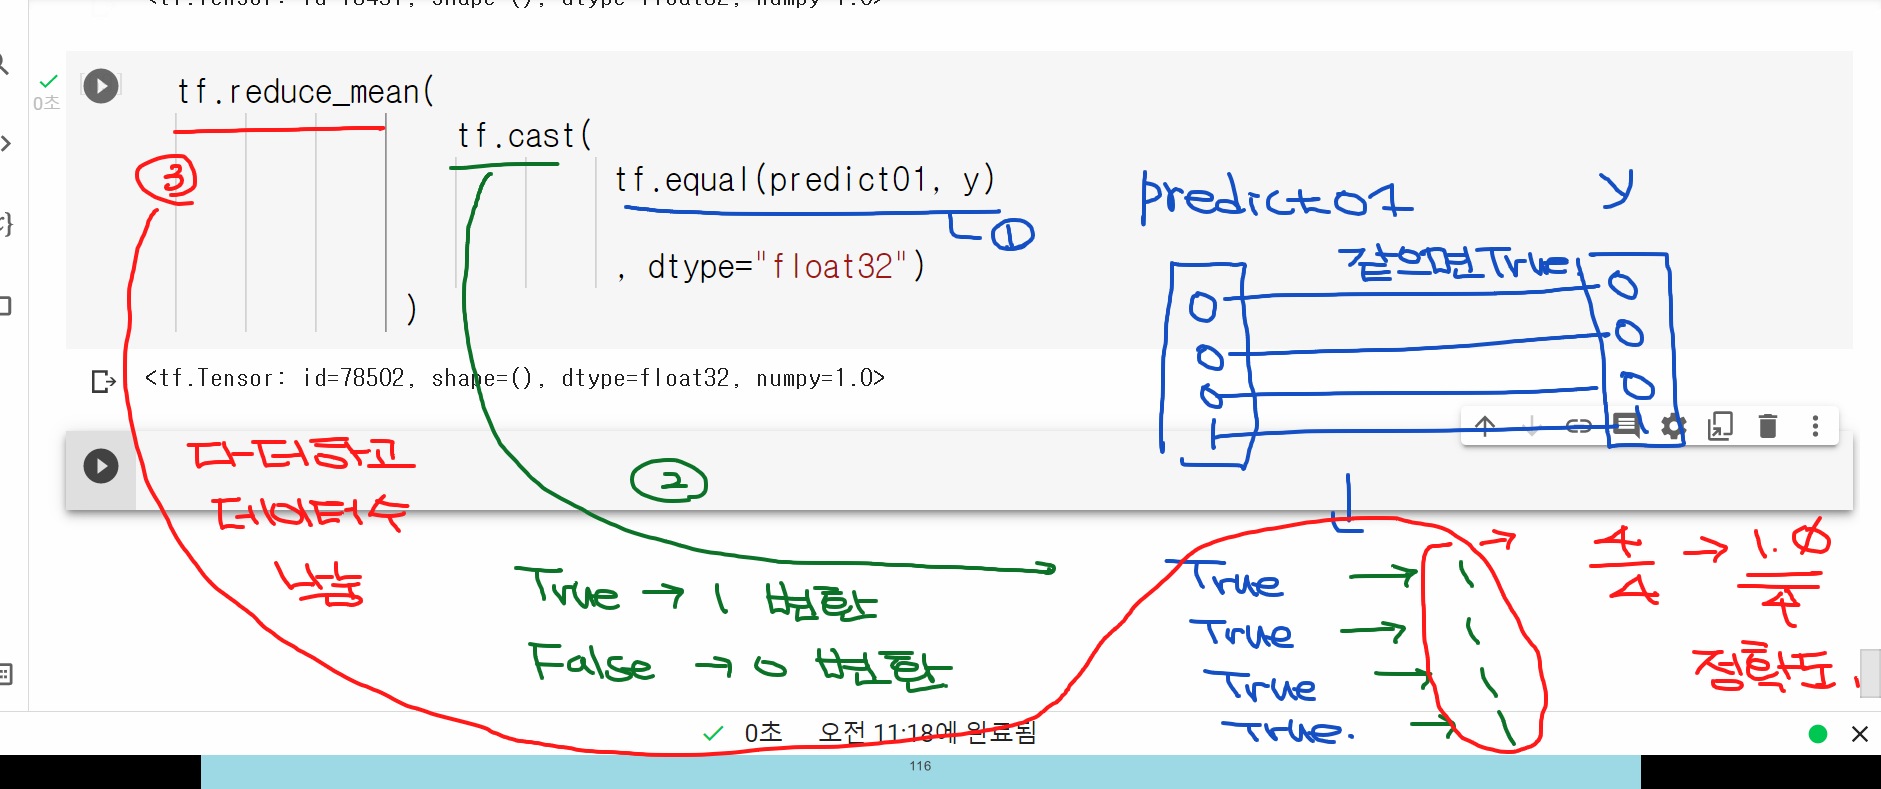

In [ ]:
tf.reduce_mean( 
                tf.cast(
                         tf.equal(predict01, y) 
                         
                         , dtype="float32") 
             )

<tf.Tensor: id=78502, shape=(), dtype=float32, numpy=1.0>

In [ ]:
accuracy = tf.reduce_mean( 
                tf.cast(
                         tf.equal(predict01, y) 
                         
                         , dtype="float32") 
             )

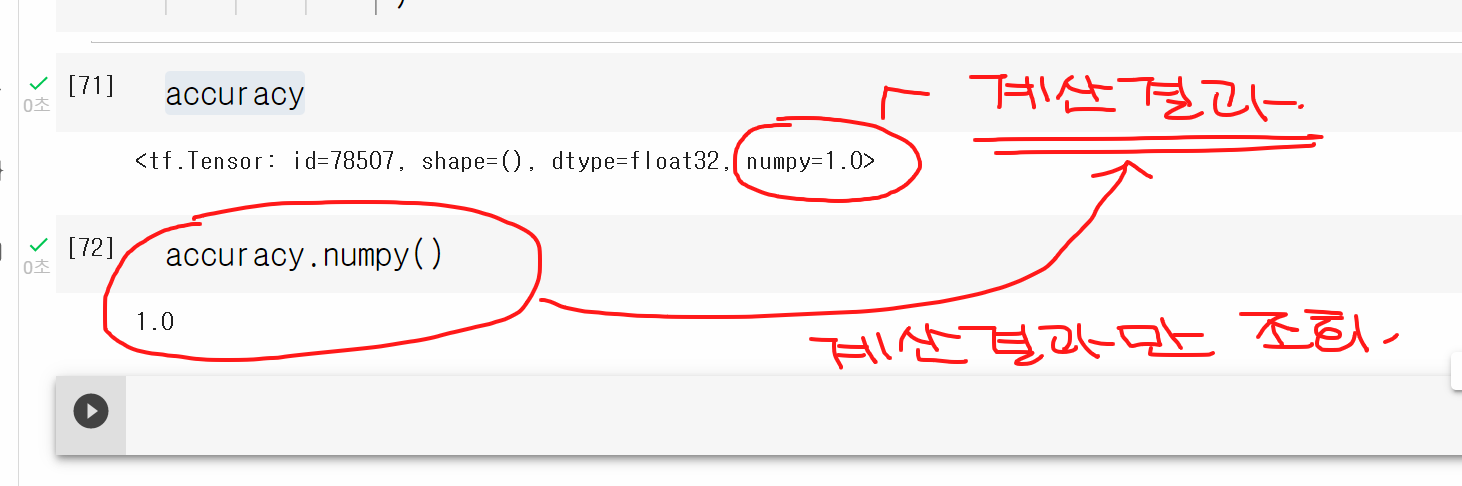

In [ ]:
accuracy

<tf.Tensor: id=78507, shape=(), dtype=float32, numpy=1.0>

In [ ]:
accuracy.numpy()

1.0